In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"../Data/aadru.us.csv",parse_dates=["Date"])

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,16.951,17.067,16.951,17.067,7003,0
1,2005-02-28,17.027,17.027,16.951,16.974,9145,0
2,2005-03-01,17.036,17.044,17.013,17.044,16347,0
3,2005-03-02,16.867,16.982,16.859,16.951,72413,0
4,2005-03-03,17.027,17.027,17.027,17.027,389,0


In [4]:
len(data)

3019

### Stock Price Dataset - Column Description

- **Date** — Time index
- **Open** — Opening price
- **High** — Highest price that day
- **Low** — Lowest price that day
- **Close** — Closing price (often used as the main prediction target)
- **Volume** — Number of shares traded
- **OpenInt** — Open interest


In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [6]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3019 non-null   datetime64[ns]
 1   Open     3019 non-null   float64       
 2   High     3019 non-null   float64       
 3   Low      3019 non-null   float64       
 4   Close    3019 non-null   float64       
 5   Volume   3019 non-null   int64         
 6   OpenInt  3019 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 165.2 KB


In [10]:
data.describe()

,Date,Open,High,Low,Close,Volume,OpenInt
count,3019,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.0
mean,2011-05-22 04:46:11.248757760,18.476098,18.557208,18.380602,18.473807,9176.942696,0.0
min,2005-02-25 00:00:00,9.088600,9.328900,9.088600,9.165800,0.000000,0.0
25%,2008-03-31 12:00:00,16.273000,16.339500,16.221000,16.269000,1432.000000,0.0
50%,2011-04-05 00:00:00,18.493000,18.538000,18.388000,18.457000,3623.000000,0.0
75%,2014-07-19 12:00:00,21.070000,21.152000,20.976000,21.073000,9110.500000,0.0
max,2017-11-10 00:00:00,25.862000,26.258000,25.540000,26.258000,631112.000000,0.0
std,NaN,3.158648,3.154493,3.151262,3.145670,25150.389503,0.0


From here we can find out the starting date and the ending date of the dataset as well as the Minimum and Max closing price

In [11]:
data.corr()

,Date,Open,High,Low,Close,Volume,OpenInt
Date,1.000000,0.127677,0.119795,0.140101,0.130866,-0.217366,NaN
Open,0.127677,1.000000,0.998764,0.998535,0.998145,0.137158,NaN
High,0.119795,0.998764,1.000000,0.997520,0.998791,0.147309,NaN
Low,0.140101,0.998535,0.997520,1.000000,0.998718,0.129437,NaN
Close,0.130866,0.998145,0.998791,0.998718,1.000000,0.138999,NaN
Volume,-0.217366,0.137158,0.147309,0.129437,0.138999,1.000000,NaN
OpenInt,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 📌 Why is Volume not strongly correlated with Open, High, Low, Close?

Because **Volume measures how many shares were traded, not their price**.

👉 **Price** (Open, High, Low, Close) moves based on buying/selling pressure, but the **number of shares traded** (Volume) doesn't have a simple linear relationship to the **price level**.

- Prices can **rise on low volume**.
- Prices can **fall on high volume**.
- Sometimes **no price change**, but **very high volume**.

🔵 **Volume measures activity**,  
🔴 **Price measures value**.

That's why **correlation is weak** between **Volume** and **price features**.


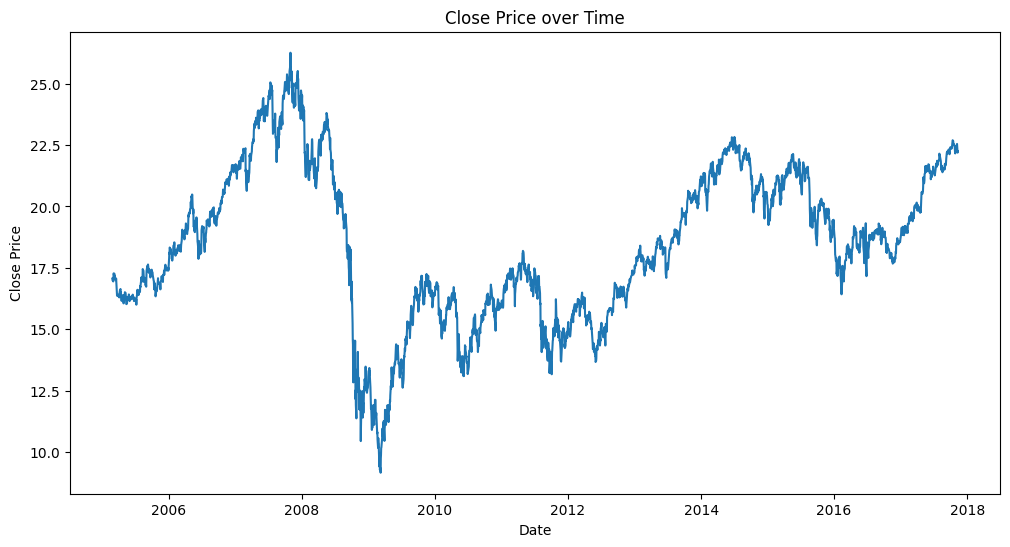

In [12]:
# Line plot: Close Price
plt.figure(figsize=(12,6))
plt.plot(data["Date"],data['Close'])
plt.title('Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

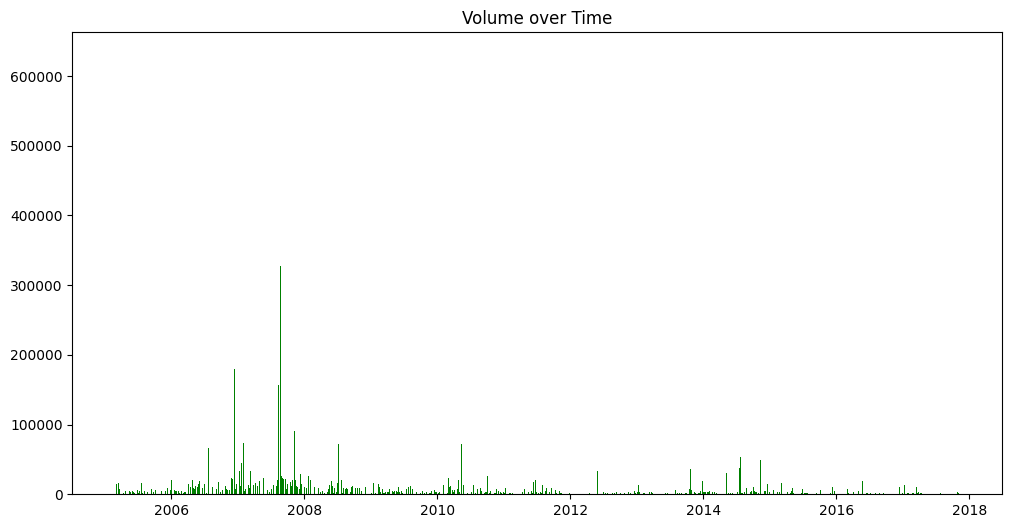

In [13]:
# Volume bar chart
plt.figure(figsize=(12,6))
plt.bar(data["Date"], data['Volume'], color='green')
plt.title('Volume over Time')
plt.show()

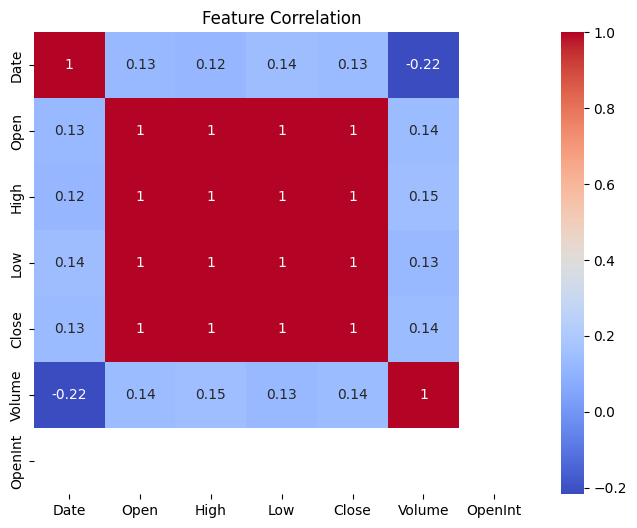

In [14]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [15]:
#Filtering the dataset for a particular year

In [16]:
y2008=data[data["Date"].dt.year==2008].sort_values(by=["Date"])

In [17]:
y2008

,Date,Open,High,Low,Close,Volume,OpenInt
694,2008-01-02,24.353,24.713,24.313,24.376,148385,0
695,2008-01-03,24.528,24.575,24.468,24.521,10031,0
696,2008-01-04,24.468,24.468,23.965,23.972,11386,0
697,2008-01-07,24.105,24.222,23.943,24.113,16714,0
698,2008-01-08,24.391,24.413,23.503,23.503,29299,0
...,...,...,...,...,...,...,...
941,2008-12-24,12.471,12.471,12.402,12.419,7955,0
942,2008-12-26,12.480,12.565,12.471,12.565,5180,0
943,2008-12-29,12.349,12.874,12.349,12.626,47404,0
944,2008-12-30,12.759,12.874,12.759,12.865,10067,0


In [18]:
#Sampling 10 rows for comparing prices in a grouped bar chart
rand_dates=data.sample(10)

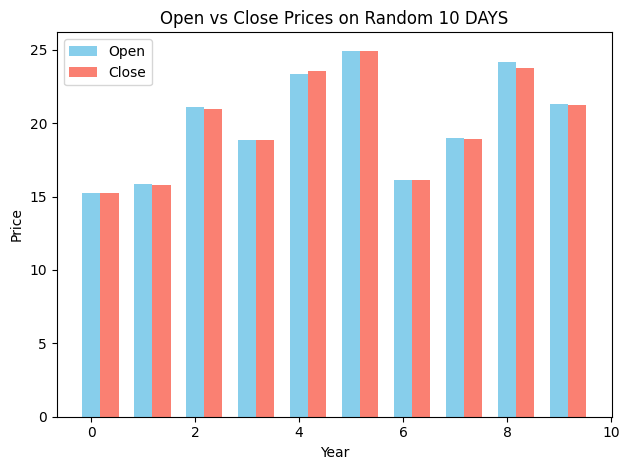

In [19]:
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(rand_dates['Date'][:10]))          # First group
r2 = [x + bar_width for x in r1]          # Second group shifted

# Create grouped bar plot
plt.bar(r1, rand_dates['Open'][:10], width=bar_width, label='Open', color='skyblue')
plt.bar(r2, rand_dates['Close'][:10], width=bar_width, label='Close', color='salmon')

# Add labels
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Open vs Close Prices on Random 10 DAYS')
plt.legend()

plt.tight_layout()
plt.show()

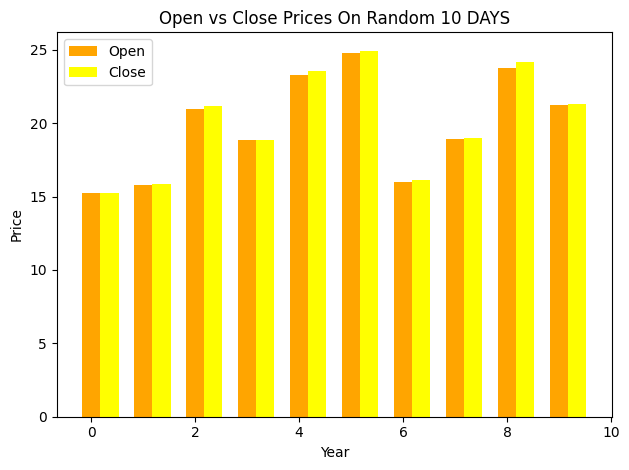

In [20]:
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(rand_dates['Date'][:10]))          # First group
r2 = [x + bar_width for x in r1]          # Second group shifted

# Create grouped bar plot
plt.bar(r1, rand_dates['Low'][:10], width=bar_width, label='Open', color='orange')
plt.bar(r2, rand_dates['High'][:10], width=bar_width, label='Close', color='yellow')

# Add labels
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Open vs Close Prices On Random 10 DAYS')

plt.legend()

plt.tight_layout()
plt.show()

In [21]:
#Sorting the dataframe by Date for accurate Time series predictions
data.sort_values(by=["Date"],inplace=True)

In [22]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

### Extracting features and target columns (X&Y)

In [23]:
X=data[["Open","High","Low","Volume"]]

In [24]:
y=data["Close"]

In [25]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error



### Set up K-Fold cross validations for large datasets to reduce variance

In [26]:
model=LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
mean_error=[]

for train_index, val_index in kf.split(X):
    # 👇 use .iloc to select by row positions
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    me=mean_squared_error(y_val,y_pred)
    r2_scores.append(r2)
    mean_error.append(me)

print("Average R²:", np.mean(r2_scores))
print("Average Mean Squared Error:", np.mean(mean_error))

Average R²: 0.9987653848364448
Average Mean Squared Error: 0.012045990922297134


In [27]:
from sklearn.model_selection import train_test_split

### Splitting the dataset for training and validation sets

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [29]:
X_train.shape

(2415, 4)

In [30]:
y_train.shape


(2415,)

In [31]:
X_test.shape

(604, 4)

### Standardising(Scaling) the dataset to increase convergence and yield greater accuracies

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()


In [34]:
X_train_scaled=scaler.fit_transform(X_train)

### Training and Testing the model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model=LinearRegression()

In [37]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [38]:
X_test_scaled=scaler.transform(X_test)

In [39]:
y_pred=model.predict(X_test_scaled)

In [40]:
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
mean_squared_error(y_test,y_pred)

0.011150462555717814

In [42]:
r2_score(y_test,y_pred)

0.998859492760668

In [43]:
X_test["Date"]=data.loc[list(X_test.index)]["Date"]

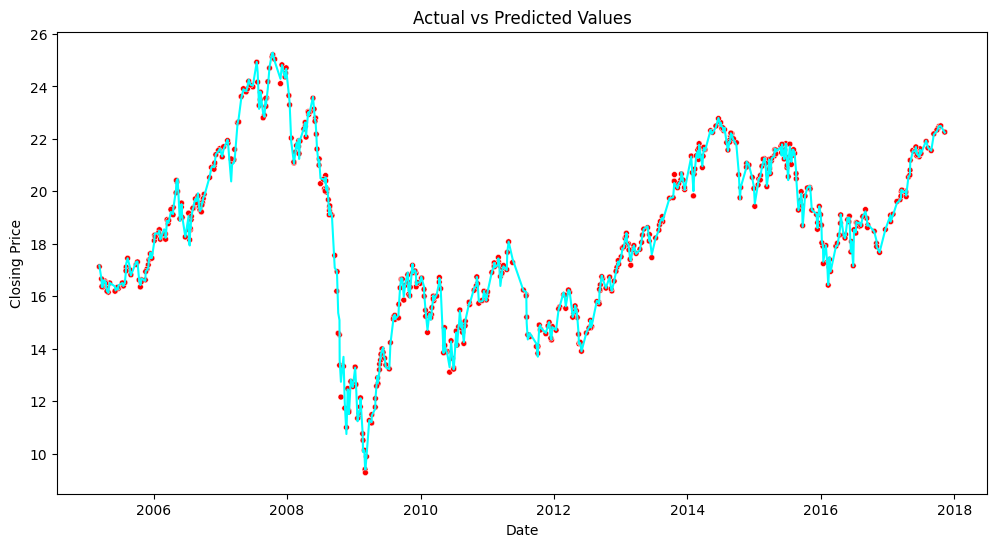

In [44]:
# Line plot: Actual vs Predicted values
plt.figure(figsize=(12,6))

sns.scatterplot(x=X_test["Date"],y=y_test,size=9,legend=False,color="red")
sns.lineplot(x=X_test["Date"],y=y_pred,color="cyan")
plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

## Pickling the Model to build an interrface

In [45]:
import pickle
import os

In [46]:
#pickling the model
path=r'../Models/LRModel.pkl'
if not os.path.exists(path):
    with open(path,'wb') as modelfile:
        pickle.dump(model,modelfile)

In [47]:
#pickling the scaler
path=r'../Models/LRScaler.pkl'
if not os.path.exists(path):
    with open(path,'wb') as modelfile:
        pickle.dump(scaler,modelfile)